## Make necessary imports

In [1]:
import sys
sys.path.insert(0, '../')
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, linewidth=200, suppress=True)
from library.datasets.cifar10 import CIFAR10
from library.utils import file_utils
from library.plot_tools import plot_tools
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as skm
from sklearn import svm
from sklearn.externals import joblib
import os, time
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

None


In [2]:
total_time = 0

## Experiment

In [3]:
exp_no = 102
file_no = 1
one_hot = False
data_source = 'Website'
train_validate_split = 0.2
num_images_required = 1.0
scale_method = 'StandardScaler'

In [4]:
svm_kernel = 'rbf'
svm_gamma = 0.001
svm_c = 10.0
svm_max_iter = 10000
svm_cs =1000

In [5]:
param_name = 'exp_' + str(exp_no).zfill(3) + '_kernel_' + svm_kernel
output_directory = '../logs/cifar10/' + str(file_no).zfill(2) + '_svm_raw/' + 'exp_no_' + str(exp_no).zfill(3) + '/'

## Step 1: Load CIFAR 10 Dataset

In [6]:
start = time.time()
cifar10 = CIFAR10(one_hot_encode=one_hot, num_images=num_images_required,
                  train_validate_split=None, endian='little')
cifar10.load_data(train=True, test=True, data_directory='./datasets/cifar10/')
end = time.time()
print('[ Step 0] Dataset loaded in %5.6f ms' %((end-start)*1000))
print('Dataset size: ' + str(cifar10.train.data.shape))
num_train_images = cifar10.train.data.shape[0]
total_time += (end-start)

Loading CIFAR 10 Dataset
MD5sum of the file: ./datasets/cifar10/cifar-10.tar.gz is verified
Loading 50000 train images
Loading CIFAR 10 Training Dataset
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_1
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_2
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_3
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_4
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_5
Loading 10000 test images
Loading CIFAR 10 Test Dataset
Unpickling test file: ./datasets/cifar10/cifar-10-batches/test_batch
Reading unpicked test file: ./datasets/cifar10/cifar-10-batches/test_batch
Loaded CIFAR 10 Dataset in 5.8107 seconds
[ Step 0] Dataset loaded in 5811.743259 ms
Dataset size: (50000, 3072)


## Step 1.1 Display an image

Plotting CIFAR 10 Train Dataset


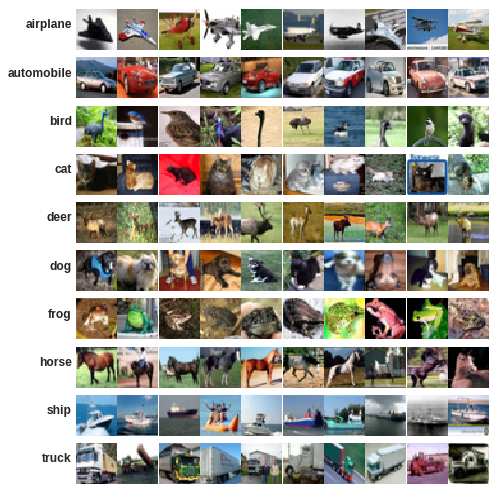

Plotting CIFAR 10 Test Dataset


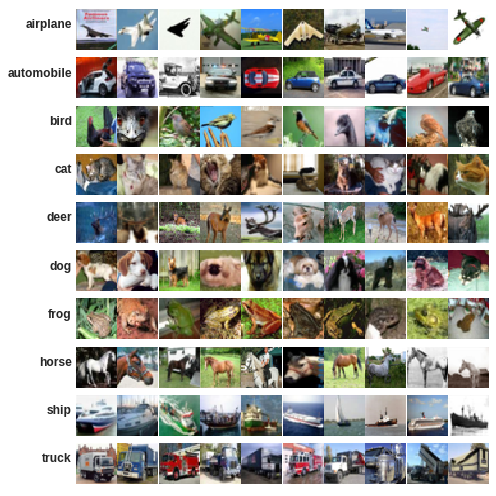

In [7]:
cifar10.plot_sample(plot_data=True, plot_test=True, fig_size=(7, 7))

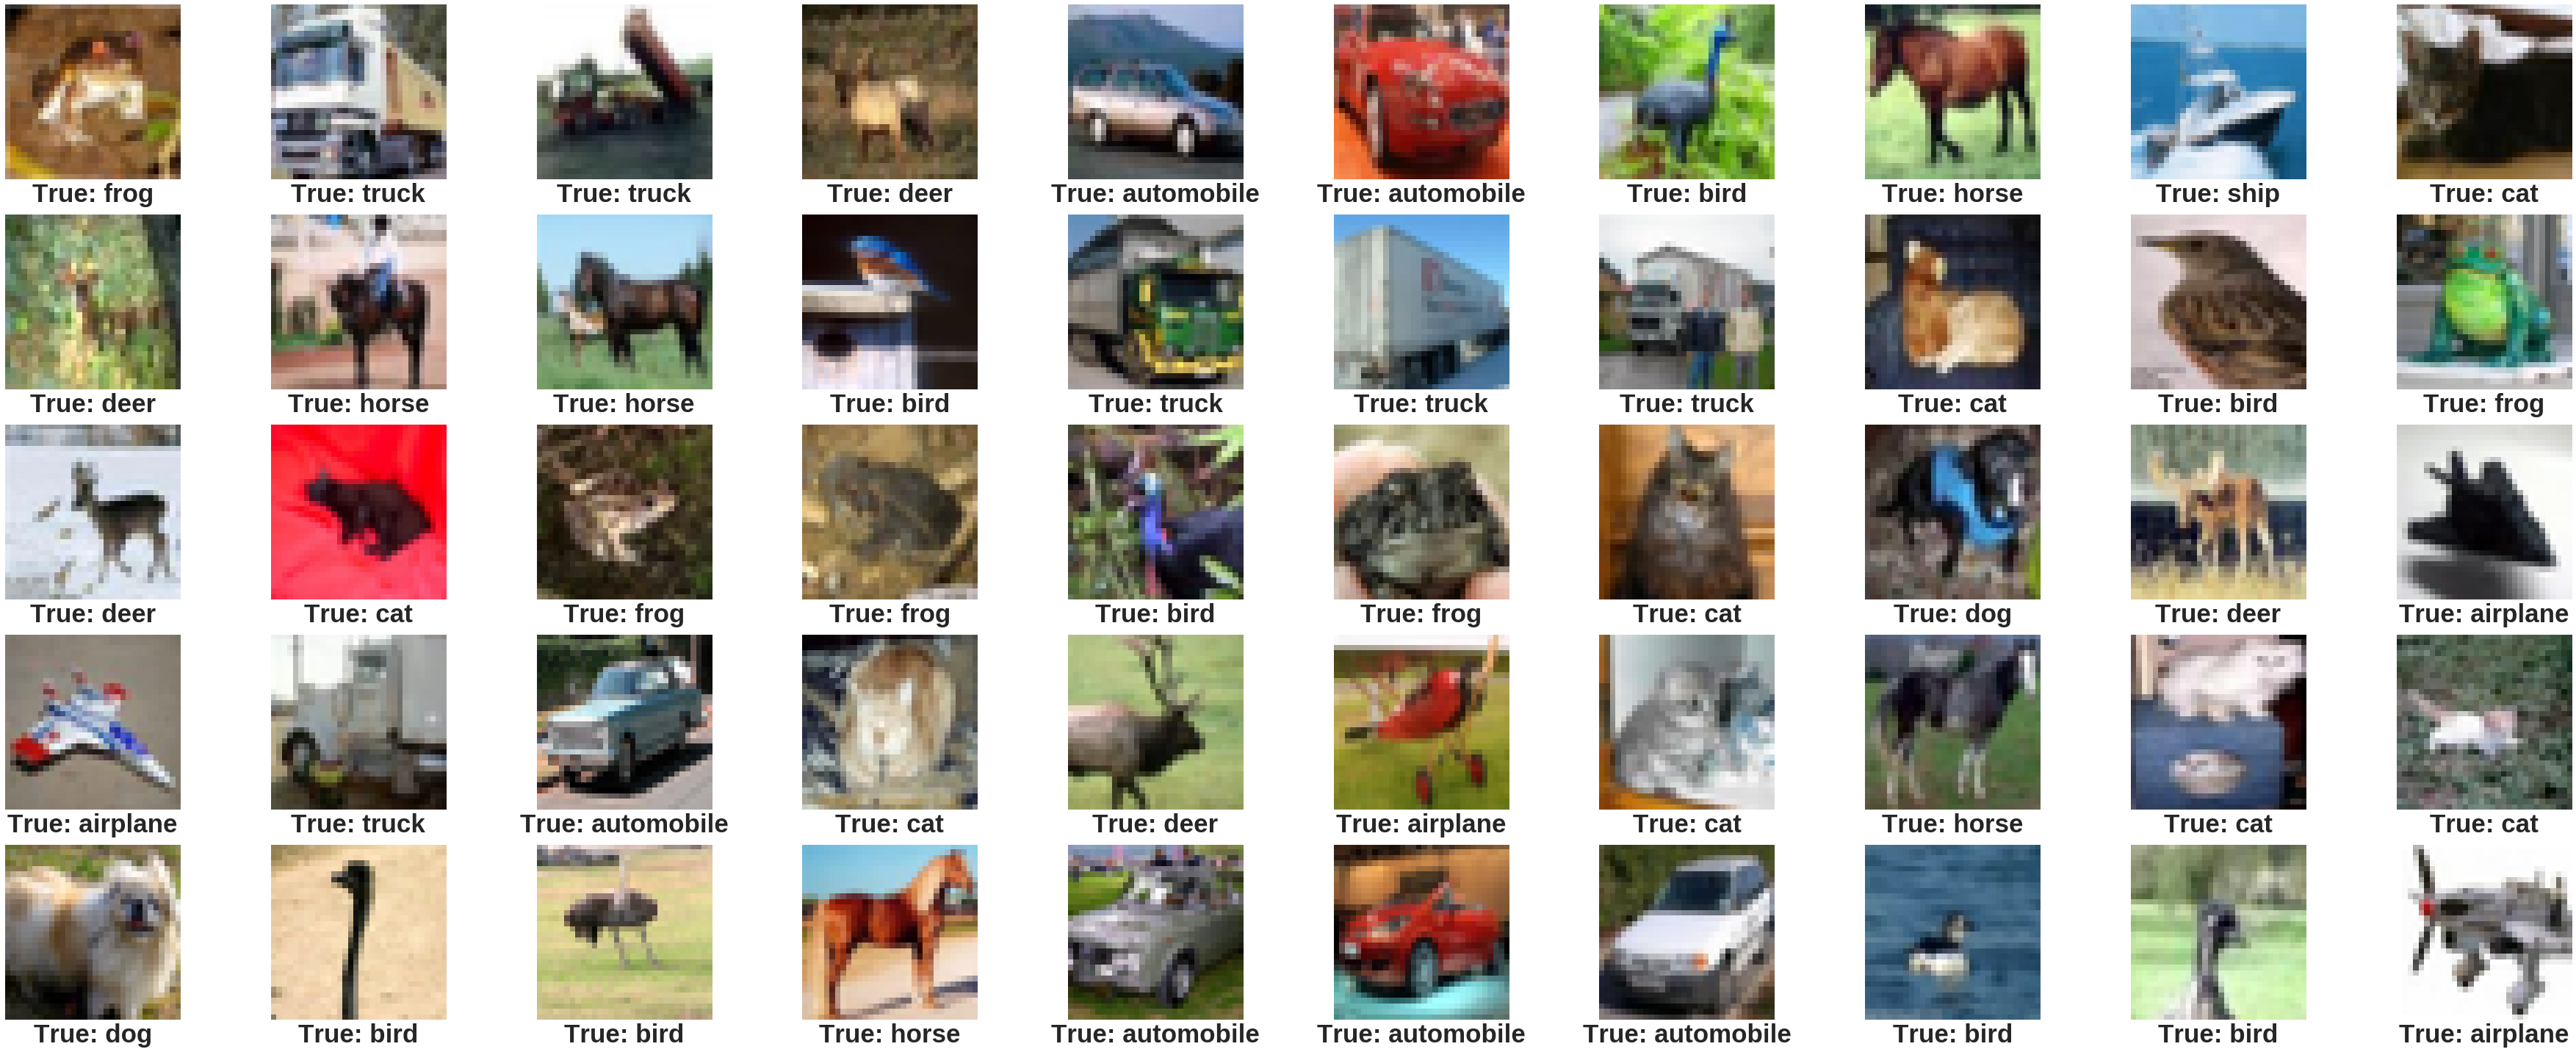

True

In [8]:
cifar10.plot_images(cifar10.train.data[:50, :], cifar10.train.class_names[:50], 
                    nrows=5, ncols=10, fig_size=(20,50), fontsize=35, convert=True)

## Step 2: Preprocess data

In [9]:
start = time.time()
if scale_method == 'StandardScaler':
    ss = StandardScaler()
elif scale_method == 'MinMaxScaler':
    ss = MinMaxScaler()
else:
    ss = StandardScaler()
data_images = ss.fit_transform(cifar10.train.data)
test_images = ss.fit_transform(cifar10.test.data)
end = time.time()
print('[ Step 2] Dataset transformations done in %.6f ms' %((end-start)*1000))
print('Training the classifier on %d images' % num_train_images)
print('Dataset size: ' + str(cifar10.train.data.shape))
total_time += (end-start)

/net/voxel03/misc/me/praneethas/Softwares/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


[ Step 2] Dataset transformations done in 2485.443354 ms
Training the classifier on 50000 images
Dataset size: (50000, 3072)


## Step 3: Train Test Split of data

In [10]:
rt = time.time()
X_train, X_test, y_train, y_test = train_test_split(data_images, cifar10.train.class_labels, 
                                                    test_size=train_validate_split)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print('Train set shape         : ' + str(X_train.shape))
print('Train labels shape      : ' + str(y_train.shape))
print('Validation set shape    : ' + str(X_test.shape))
print('Validation labels shape : ' + str(y_test.shape))
end = time.time()
print('[ Step 3] Train-test split done in %.6f ms' %((end-start)*1000))
total_time += (end-start)

Train set shape         : (40000, 3072)
Train labels shape      : (40000,)
Validation set shape    : (10000, 3072)
Validation labels shape : (10000,)
[ Step 3] Train-test split done in 3072.294950 ms


## Step 4: Initiate Support Vector Classifier

In [11]:
start = time.time()
clf = svm.SVC(kernel=svm_kernel, C=svm_c, verbose=True, max_iter=svm_max_iter, cache_size=svm_cs, gamma=svm_gamma)
print(clf)
end = time.time()
print('[ Step 4] Made the SVM classifier in %.6f ms' %((end-start)*1000))
total_time += (end-start)

SVC(C=10.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
[ Step 4] Made the SVM classifier in 0.660658 ms


## Step 5: Generate the SVC Model using the train data

In [12]:
start = time.time()
print(X_train.shape)
print(y_train.shape)
clf.fit(X_train, y_train)
end = time.time()
print('[ Step 5] Made the model in %.6f ms' %((end-start)*1000))
total_time += (end-start)

(40000, 3072)
(40000,)
[LibSVM]

/net/voxel03/misc/me/praneethas/Softwares/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[ Step 5] Made the model in 10477047.222614 ms


## Step 6: Write the obtained model to file for further use

In [13]:
start = time.time()
file_utils.mkdir_p(output_directory)
model_output_path = output_directory + '01_' + param_name + '.pkl'
joblib.dump(clf, model_output_path)
end = time.time()
print('[ Step 6] Write obtained model to %s in %.6f ms' %(model_output_path, ((end-start)*1000)))
total_time += (end-start)

[ Step 6] Write obtained model to ../logs/cifar10/01_svm_raw/exp_no_102/01_exp_102_kernel_rbf.pkl in 15090.391874 ms


## Step 7: Do the prediction on validation set

Labels  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Classes : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Confusion matrix, without normalization
[[601  63  47  35  20  20  20  26 115  91]
 [ 26 682  11  40   6  18  14  16  38 161]
 [ 70  26 428  92 124  84  82  48  20  43]
 [ 22  26  63 406  45 183  65  35  21  81]
 [ 53  27 141  86 446  64  76  76  23  31]
 [ 13  33  62 244  42 430  57  62  17  45]
 [ 10  24  68 136  76  71 523  28   9  40]
 [ 26  20  50  78  64  67  15 578  13  84]
 [ 79  75   8  34  12  19   8   8 649  89]
 [ 34 153  10  27   9  24  14  25  34 667]]
Normalized confusion matrix
[[ 0.579  0.061  0.045  0.034  0.019  0.019  0.019  0.025  0.111  0.088]
 [ 0.026  0.674  0.011  0.04   0.006  0.018  0.014  0.016  0.038  0.159]
 [ 0.069  0.026  0.421  0.09   0.122  0.083  0.081  0.047  0.02   0.042]
 [ 0.023  0.027  0.067  0.429  0.048  0.193  0.069  0.037  0.022  0.086]
 [ 0.052  0.026  0.138  0.084  0.436  0.063  0.074  0.074  0.022  0

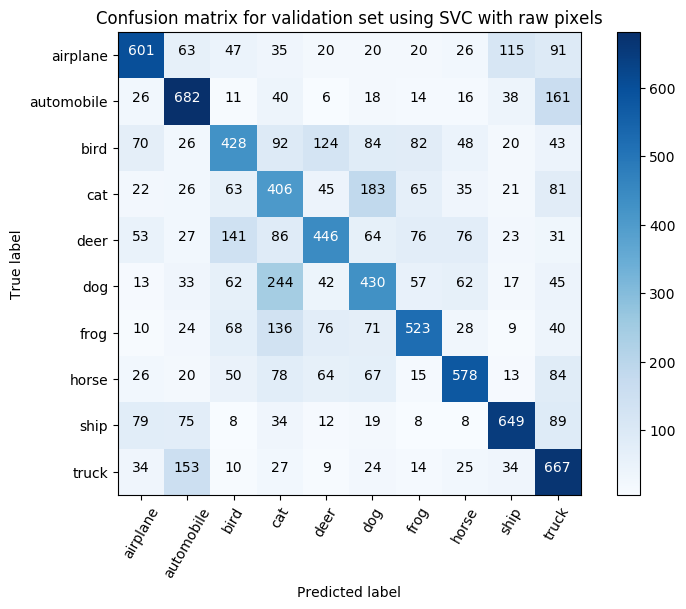

[ Step 7] Make prediction on validation dataset in 1488343.571186 ms


In [14]:
y_predict = clf.predict(X_test)
labels = sorted(list(set(cifar10.train.class_labels)))
print('Labels  : ' + str(labels))
print('Classes : ' + str(cifar10.classes))
plot_tools.plot_confusion_matrix(y_test, y_predict, classes=cifar10.classes, fig_size=(8,6),
                              normalize=True, title='Confusion matrix for validation set using SVC with raw pixels')
end = time.time()
print('[ Step 7] Make prediction on validation dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

## Step 8: Generate the Classification report

In [15]:
start = time.time()
print('Classification report:')
print(skm.classification_report(y_test, y_predict, target_names=cifar10.classes))
validate_accuracy = skm.accuracy_score(y_test, y_predict, normalize=True)
print('Validation accuracy score: ' + str(validate_accuracy))
end = time.time()
print('[ Step 8] Generating classification on validation dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

Classification report:
             precision    recall  f1-score   support

   airplane       0.64      0.58      0.61      1038
 automobile       0.60      0.67      0.64      1012
       bird       0.48      0.42      0.45      1017
        cat       0.34      0.43      0.38       947
       deer       0.53      0.44      0.48      1023
        dog       0.44      0.43      0.43      1005
       frog       0.60      0.53      0.56       985
      horse       0.64      0.58      0.61       995
       ship       0.69      0.66      0.68       981
      truck       0.50      0.67      0.57       997

avg / total       0.55      0.54      0.54     10000

Validation accuracy score: 0.541
[ Step 8] Generating classification on validation dataset in 127.514839 ms


## Step 9: Generate the predictions on test data set

In [16]:
start = time.time()
prediction_numbers = clf.predict(test_images)
prediction_classes = []
num_test_images = test_images.shape[0]
for i in range(num_test_images):
    prediction_classes.append(cifar10.classes[int(prediction_numbers[i])])
end = time.time()
print('[ Step 9] Make prediction on test dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

[ Step 9] Make prediction on test dataset in 1528257.691622 ms


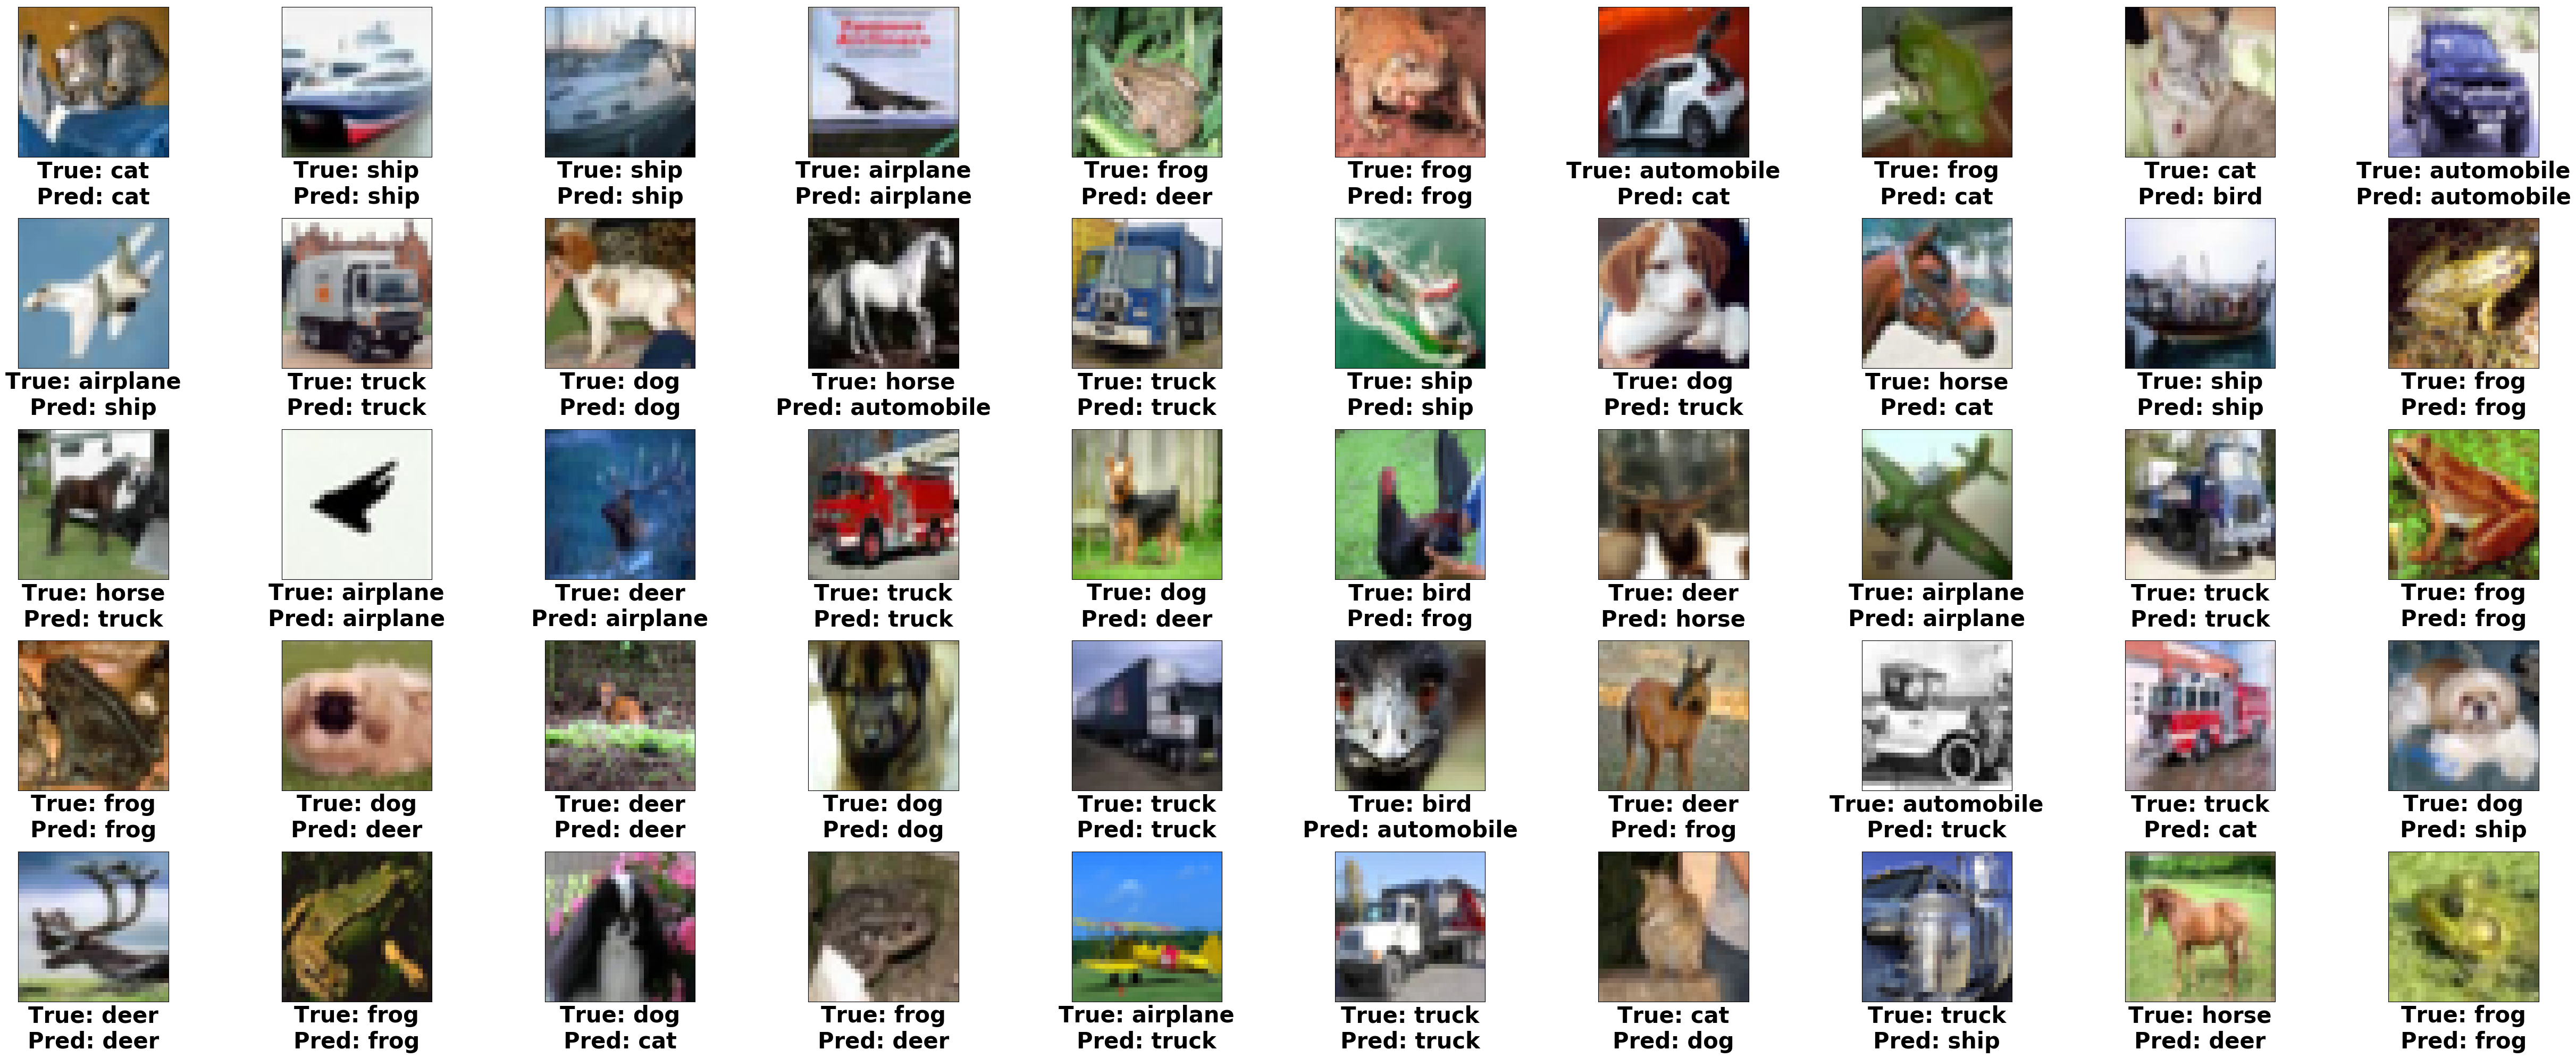

True

In [17]:
cifar10.plot_images(cifar10.test.data[:50], cifar10.test.class_names[:50], cls_pred=prediction_classes[:50], 
                    nrows=5, ncols=10, fig_size=(20,50), fontsize=30, convert=True)

## Step 10: Print the accuracy score of the classifier

Confusion matrix, without normalization
[[592  48  55  22  21  19  22  18 113  90]
 [ 22 681  10  46   7  17   9  14  35 159]
 [ 72  27 405 115 107  82  82  58  20  32]
 [ 22  41  76 412  49 178  83  40  18  81]
 [ 48  22 148  81 450  49  85  70  25  22]
 [ 17  14  65 228  56 454  45  56  20  45]
 [ 10  31  83 123  84  45 564  23   7  30]
 [ 26  33  36  86  53  72  16 558  10 110]
 [ 80  84  12  42  19  20   6  15 645  77]
 [ 27 148   8  43   4  22  13  24  51 660]]
Normalized confusion matrix
[[ 0.592  0.048  0.055  0.022  0.021  0.019  0.022  0.018  0.113  0.09 ]
 [ 0.022  0.681  0.01   0.046  0.007  0.017  0.009  0.014  0.035  0.159]
 [ 0.072  0.027  0.405  0.115  0.107  0.082  0.082  0.058  0.02   0.032]
 [ 0.022  0.041  0.076  0.412  0.049  0.178  0.083  0.04   0.018  0.081]
 [ 0.048  0.022  0.148  0.081  0.45   0.049  0.085  0.07   0.025  0.022]
 [ 0.017  0.014  0.065  0.228  0.056  0.454  0.045  0.056  0.02   0.045]
 [ 0.01   0.031  0.083  0.123  0.084  0.045  0.564  0.023  0.00

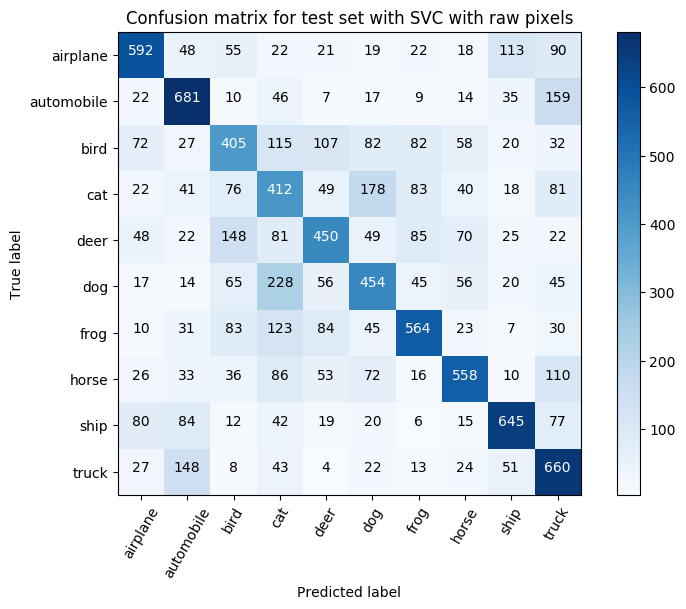

             precision    recall  f1-score   support

   airplane       0.65      0.59      0.62      1000
 automobile       0.60      0.68      0.64      1000
       bird       0.45      0.41      0.43      1000
        cat       0.34      0.41      0.37      1000
       deer       0.53      0.45      0.49      1000
        dog       0.47      0.45      0.46      1000
       frog       0.61      0.56      0.59      1000
      horse       0.64      0.56      0.59      1000
       ship       0.68      0.65      0.66      1000
      truck       0.51      0.66      0.57      1000

avg / total       0.55      0.54      0.54     10000

Accuracy score on test data: 0.5421


In [18]:
start = time.time()
plot_tools.plot_confusion_matrix(cifar10.test.class_labels, prediction_numbers, classes=cifar10.classes,
                              normalize=True, title='Confusion matrix for test set with SVC with raw pixels')
print(skm.classification_report(cifar10.test.class_labels, prediction_numbers, target_names=cifar10.classes))
test_accuracy = skm.accuracy_score(cifar10.test.class_labels, prediction_numbers, normalize=True)
print('Accuracy score on test data: ' + str(test_accuracy))
end = time.time()
total_time += (end-start)

In [19]:
start = time.time()
print('Prediction done on %d images' %cifar10.test.data.shape[0])
print('Accuracy of the classifier: %.4f' %clf.score(test_images, cifar10.test.class_labels))
end = time.time()
total_time += (end-start)

Prediction done on 10000 images
Accuracy of the classifier: 0.5421


## Step 11: Write the predictions to CSV file

In [20]:
start = time.time()
indices = np.arange(1, cifar10.test.data.shape[0]+1)
predictions = np.column_stack((indices, prediction_classes))
file_utils.mkdir_p(output_directory)
output_csv_file = output_directory + '01_' + param_name + '.csv'
column_names = ['id', 'label']
predict_test_df = pd.DataFrame(data=predictions, columns=column_names)
predict_test_df.to_csv(output_csv_file, index=False)
end = time.time()
print('[ Step 11] Writing the test data to file: %s in %.6f ms' %(output_csv_file, (end-start)*1000))
total_time += (end-start)

[ Step 11] Writing the test data to file: ../logs/cifar10/01_svm_raw/exp_no_102/01_exp_102_kernel_rbf.csv in 293.480635 ms


In [21]:
print('Code took %.6f s to run on training with %d examples' % (total_time,num_train_images))

Code took 15056.281344 s to run on training with 50000 examples


## Print the parameters for record

In [22]:
print('| %d | ' %exp_no, end='')
print('%d | '%num_train_images, end='')
print('Kernel = %s, C = %.2f, Max. Iterations: %d, Cache size = %d, Random State: 1 | ' 
      %(svm_kernel, svm_c, svm_max_iter, svm_cs), end='')
print('[Link](%s) | ' %output_csv_file, end='')
print('%.4f | ' %validate_accuracy, end='')
print('%.4f | ' %test_accuracy, end='')
print('%s | ' %data_source, end='')
print('[Link](%s) |' %model_output_path)

| 102 | 50000 | Kernel = rbf, C = 10.00, Max. Iterations: 10000, Cache size = 1000, Random State: 1 | [Link](../logs/cifar10/01_svm_raw/exp_no_102/01_exp_102_kernel_rbf.csv) | 0.5410 | 0.5421 | Website | [Link](../logs/cifar10/01_svm_raw/exp_no_102/01_exp_102_kernel_rbf.pkl) |


## Step 12: Write the notebook to HTML file

In [23]:
def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    output_notebook = nbformat.read(read_file, as_version=4)
    print()
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [24]:
%%javascript
var notebook = IPython.notebook
notebook.save_notebook()

<IPython.core.display.Javascript object>

In [27]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [28]:
current_file = './' + theNotebook + '.ipynb'
output_file = output_directory + str(file_no).zfill(2) + '_exp_no_' + str(exp_no) + '_' + theNotebook + '.html'
print('Current file: ' + str(current_file))
print('Output file: ' + str(output_file))
file_utils.mkdir_p(output_directory) 
output_HTML(current_file, output_file)

Current file: ./01_SVM_Raw_Features_CIFAR_10_Website.ipynb
Output file: ../logs/cifar10/01_svm_raw/exp_no_102/01_exp_no_102_01_SVM_Raw_Features_CIFAR_10_Website.html



In [29]:
print('Code took %.6f s to run on training with %d examples' % (total_time,num_train_images))

Code took 15056.281344 s to run on training with 50000 examples
